<a href="https://colab.research.google.com/github/carlyle1233/22-2_IT_mining/blob/main/classification_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020년도 건강검진정보 샘플(1만건) 데이터를 이용히야 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오. 


(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 

(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 
   
(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  
(4) 코드는 github에 올리고 주소 제출

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기 

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab Notebooks_school/Colab Notebooks/아비혁/data/health_data.csv')
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [7]:
#결측치 확인 
df.isna().sum()

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

## 당뇨병일 가능성이 높은 사람 분류 



<당뇨병의 진단 기준> 
*   8시간 이상 금식한 상태에서 공복혈당이 126mg/dL 이상인 경우

<당뇨병전단계 (당뇨병 고위험군)>


*   공복혈당장애는 공복혈장포도당 100-125 mg/dL로 정의한다. 

<제2형 당뇨병의 예방> 
*   당뇨병전단계에서 당뇨병 발생을 예방하기 위해 체계적인 생활습관개선을 권고한다.
*   비만이거나 과체중인 당뇨병전단계 환자에게는 처음 체중에서 5-10%를 감량해 유지하고, 중강도 신체활동을 최소 주 150분 하도록 생활습관개선을 권고한다. 


*   당뇨병전단계에서 당뇨병으로의 진행을 막기 위해서 약물 중재를 고려할 수 있다.









## 당뇨병에 관한 데이터 프레임 새로 생성

In [8]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')

In [9]:
#당뇨병과 상관없는 변수 제거 

df_d=df.drop(columns=['시력(좌)', '시력(우)', '청력(좌)', '청력(우)','구강검진수검여부', '치아우식증유무',
                      '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
                      '치석', '데이터공개일자',
                      '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'])

In [10]:
df_d

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,No,No
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,No,No
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,No,No
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,No,No
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,No,Yes
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,No,Yes
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,No,No
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,No,No


### 결측치 제거 

In [11]:
#결측치 제거 

#공복혈당 결측치 제거 
df_d.dropna(subset=['식전혈당(공복혈당)'],axis=0,inplace=True)

#흡연 결측치 제거 
df_d.dropna(subset=['흡연상태'],axis=0,inplace=True)

#음주 결측치 제거 
df_d.dropna(subset=['음주여부'],axis=0,inplace=True)


In [12]:
df_d.isna().sum()

기준년도           0
가입자일련번호        0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
흡연상태           0
음주여부           0
dtype: int64

In [13]:
df_d

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,No,No
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,No,No
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,No,No
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,No,No
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,No,Yes
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,No,Yes
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,No,No
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,No,No


### 새로운 변수 생성

#### 비만 기준 


<대한비만학회 비만 진료지침 2020>

*   BMI= kg/m^2 
*   BMI 23-24.9 kg/m^2: 비만 전 단계 (과체중 or 위험체중)
*   BMI 25-29.9 kg/m^2: 1단계 비만
*   BMI 30-34.9 kg/m^2: 2단계 비만
*   BMI >= 35 kg/m^2: 고도비만





In [14]:
#체중에 관한 변수 생성 
#비만, 과체중, 정상

df_d['키(m)'] =df_d['신장(5Cm단위)'] / 100  
df_d['BMI'] = df_d['체중(5Kg 단위)'] / (df_d['키(m)']*df_d['키(m)'])

In [15]:

비만=[] 

for row in df_d['BMI']:
  if row >=35:
    비만.append('고도비만')
  elif row >30:
    비만.append('2단계 비만')
  elif row >25: 
    비만.append('1단계 비만')
  elif row >23:
    비만.append('과체중')
  else:
    비만.append('정상')

df_d['비만']=비만
df_d


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부,키(m),BMI,비만
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,No,No,1.65,22.038567,정상
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,No,No,1.50,28.888889,1단계 비만
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,No,No,1.55,22.892820,정상
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,No,No,1.60,27.343750,1단계 비만
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,No,No,1.55,20.811655,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,No,Yes,1.55,22.892820,정상
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,No,Yes,1.60,21.484375,정상
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,No,No,1.60,31.250000,2단계 비만
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,No,No,1.55,22.892820,정상


#### 복부비만 기준 



*   허리둘레 >=90cm: 성인 남자
*   허리둘레 >=85cm: 성인 여자



In [16]:

#복부비만에 관한 변수 생성 
df_d['복부비만']=np.where(((df_d['성별코드'] =='M') & (df_d['허리둘레'] >=90)), 1,0)
df_d['복부비만']=np.where(((df_d['성별코드'] =='F') & (df_d['허리둘레'] >=85)), 1,0) 

In [17]:
df_d

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부,키(m),BMI,비만,복부비만
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,No,No,1.65,22.038567,정상,0
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,No,No,1.50,28.888889,1단계 비만,0
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,No,No,1.55,22.892820,정상,0
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,No,No,1.60,27.343750,1단계 비만,0
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,No,No,1.55,20.811655,정상,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,No,Yes,1.55,22.892820,정상,0
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,No,Yes,1.60,21.484375,정상,0
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,No,No,1.60,31.250000,2단계 비만,0
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,No,No,1.55,22.892820,정상,0


#### 당뇨기준

<당뇨병의 진단 기준> 
*   8시간 이상 금식한 상태에서 공복혈당이 126mg/dL 이상인 경우

<당뇨병전단계 (당뇨병 고위험군)>


*   공복혈당장애는 공복혈장포도당 100-125 mg/dL로 정의한다. 

In [18]:
#당뇨 변수 생성 
#정상, 당뇨 전단계, 당뇨

In [19]:
당뇨=[]
for row in df_d['식전혈당(공복혈당)']:
  if row >=126:
    당뇨.append('당뇨')
  elif row >=100:
    당뇨.append('당뇨전단계')
  else:
    당뇨.append('정상')

df_d['당뇨']=당뇨
df_d

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부,키(m),BMI,비만,복부비만,당뇨
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,No,No,1.65,22.038567,정상,0,정상
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,No,No,1.50,28.888889,1단계 비만,0,정상
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,No,No,1.55,22.892820,정상,0,당뇨전단계
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,No,No,1.60,27.343750,1단계 비만,0,당뇨
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,No,No,1.55,20.811655,정상,0,당뇨전단계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,No,Yes,1.55,22.892820,정상,0,당뇨전단계
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,No,Yes,1.60,21.484375,정상,0,당뇨전단계
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,No,No,1.60,31.250000,2단계 비만,0,정상
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,No,No,1.55,22.892820,정상,0,당뇨전단계


#### 고혈압 기준 



<고혈압 기준>
*   수축기 혈압 140mmHg 이상 또는 이완기 혈압 90mmHg 이상 



In [20]:

df_d['고혈압']=np.where(((df_d['수축기혈압'] >=140) | (df_d['이완기혈압'] >=90)), 1,0)
df_d

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부,키(m),BMI,비만,복부비만,당뇨,고혈압
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,No,No,1.65,22.038567,정상,0,정상,0
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,No,No,1.50,28.888889,1단계 비만,0,정상,0
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,No,No,1.55,22.892820,정상,0,당뇨전단계,0
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,No,No,1.60,27.343750,1단계 비만,0,당뇨,0
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,No,No,1.55,20.811655,정상,0,당뇨전단계,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,No,Yes,1.55,22.892820,정상,0,당뇨전단계,0
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,No,Yes,1.60,21.484375,정상,0,당뇨전단계,0
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,No,No,1.60,31.250000,2단계 비만,0,정상,0
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,No,No,1.55,22.892820,정상,0,당뇨전단계,0


In [21]:
df_d['음주여부'].value_counts()

Yes    5802
No     4107
Name: 음주여부, dtype: int64

In [22]:
df_d['흡연상태'].value_counts()

No        6159
NotNow    1918
Yes       1832
Name: 흡연상태, dtype: int64

In [23]:
display(df_d['비만'].value_counts())
print("------------------------------")

display(df_d['복부비만'].value_counts())
print("------------------------------")
display(df_d['당뇨'].value_counts())
print("------------------------------")


정상        3979
1단계 비만    3168
과체중       2264
2단계 비만     426
고도비만        72
Name: 비만, dtype: int64

------------------------------


0    8771
1    1138
Name: 복부비만, dtype: int64

------------------------------


정상       5245
당뇨전단계    3657
당뇨       1007
Name: 당뇨, dtype: int64

------------------------------


#### 새로운 파생변수를 위해서 독립변수 모두 binary로 변경 (흡연, 음주, 비만, 당뇨) 

<흡연> 


*  No: 0
*  Not Now:0.5
*  Yes: 1

<음주> 
*   No: 0
*   Yes: 1

<비만> 
*   정상: 0
*   과체중: 0.5
*   1단계비만:1
*   2단계비만:2
*   과체중: 3

<당뇨>
*   정상: 0
*   당뇨전단계: 0.5
*   당뇨: 1





In [24]:
##흡연상태 숫자로 바꾸기
df_d= df_d.replace({'흡연상태': 'No'},0)
df_d= df_d.replace({'흡연상태': 'NotNow'}, 0.5)
df_d= df_d.replace({'흡연상태': 'Yes'}, 1)

In [25]:
df_d['흡연상태'].value_counts()

0.0    6159
0.5    1918
1.0    1832
Name: 흡연상태, dtype: int64

In [26]:
#음주여부 숫자로 바꾸기 
df_d= df_d.replace({'음주여부': 'No'},0)
df_d= df_d.replace({'음주여부': 'Yes'}, 1)

In [27]:
##비만
df_d= df_d.replace({'비만': '정상'},0)
df_d= df_d.replace({'비만': '과체중'},0.5)
df_d= df_d.replace({'비만': '1단계 비만'},1)
df_d= df_d.replace({'비만': '2단계 비만'},2)
df_d= df_d.replace({'비만': '고도비만'},3)

In [28]:
## 당뇨 
df_d= df_d.replace({'당뇨': '정상'},0)
df_d= df_d.replace({'당뇨': '당뇨전단계'},0.5)
df_d= df_d.replace({'당뇨': '당뇨'},1)

In [29]:
display(df_d['비만'].value_counts())
print("------------------------------")
display(df_d['당뇨'].value_counts())
print("------------------------------")

0.0    3979
1.0    3168
0.5    2264
2.0     426
3.0      72
Name: 비만, dtype: int64

------------------------------


0.0    5245
0.5    3657
1.0    1007
Name: 당뇨, dtype: int64

------------------------------


#### 최종 데이터





*   독립변수: 흡연상태, 음주여부, 비만, 복부비만, 당뇨, 고혈압
*   종속변수: label



In [30]:
df_d

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부,키(m),BMI,비만,복부비만,당뇨,고혈압
0,2020,1,36,M,9,165,60,72.1,127.0,79.0,90.0,0.0,0,1.65,22.038567,0.0,0,0.0,0
1,2020,2,27,F,13,150,65,81.0,110.0,73.0,87.0,0.0,0,1.50,28.888889,1.0,0,0.0,0
2,2020,3,11,F,12,155,55,70.0,123.0,80.0,102.0,0.0,0,1.55,22.892820,0.0,0,0.5,0
3,2020,4,31,M,13,160,70,90.8,134.0,84.0,146.0,0.0,0,1.60,27.343750,1.0,0,1.0,0
4,2020,5,41,F,12,155,50,75.2,144.0,89.0,110.0,0.0,0,1.55,20.811655,0.0,0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,0.0,1,1.55,22.892820,0.0,0,0.5,0
9996,2020,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,0.0,1,1.60,21.484375,0.0,0,0.5,0
9997,2020,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,0.0,0,1.60,31.250000,2.0,0,0.0,0
9998,2020,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,0.0,0,1.55,22.892820,0.0,0,0.5,0


In [31]:
df_d.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '흡연상태', '음주여부',
       '키(m)', 'BMI', '비만', '복부비만', '당뇨', '고혈압'],
      dtype='object')

In [32]:
df_final=df_d[['흡연상태', '음주여부','비만', '복부비만', '당뇨', '고혈압']]
df_final

,흡연상태,음주여부,비만,복부비만,당뇨,고혈압
0,0.0,0,0.0,0,0.0,0
1,0.0,0,1.0,0,0.0,0
2,0.0,0,0.0,0,0.5,0
3,0.0,0,1.0,0,1.0,0
4,0.0,0,0.0,0,0.5,1
...,...,...,...,...,...,...
9995,0.0,1,0.0,0,0.5,0
9996,0.0,1,0.0,0,0.5,0
9997,0.0,0,2.0,0,0.0,0
9998,0.0,0,0.0,0,0.5,0


In [33]:
## 당뇨병일 사람을 예측하는 것이 과제의 목표이다. 
## 하지만, 공복혈당을 기준으로만 당뇨병을 판단하는 것은 좀 부족하다. 당뇨병은 흡연, 음주, 비만여부, 고혈압에도 영향을 받으므로, 
## 독립변수를 위와 같이 골랐다. label을 새로운 변수로 두어, 당뇨병일 가능성이 높은 사람을 점수로 표시했다. 
## 그냥 모든 변수를 더하는 경우, 이미 당뇨인 사람이 크게 가중치를 받지 못하고 다른 변수가 높은 점수일 경우, 당뇨로 표시되지 않을 가능성이 있어 
## 당뇨에 가중치 10을 주었고, 독립변수 중에 고혈압이(고혈압 환자는 정상인보다 당뇨병 발병률이 2.5배 높음 ) 가장 당뇨병과 상관관계가 높아 가중치 2.5를 두었다. 
## 흡연시 당뇨에 걸릴 확률이 30% 높고, 음주의 경우 당뇨에 걸릴 확률이 60% 가량 높아 가중치를 1.3, 1.6으로 두었다. 
## 복부비만의 경우, 당뇨병 걱릴 확률이 2배 가량 높아 가중치를 2로 두었다. 
df_final['label']= df_final['흡연상태']*1.3 + df_final['음주여부']*1.6 + df_final['비만']*3+ df_final['복부비만']*2+df_final['당뇨']*10+df_final['고혈압']*2.5


In [34]:
df_final

,흡연상태,음주여부,비만,복부비만,당뇨,고혈압,label
0,0.0,0,0.0,0,0.0,0,0.00
1,0.0,0,1.0,0,0.0,0,3.00
2,0.0,0,0.0,0,0.5,0,5.00
3,0.0,0,1.0,0,1.0,0,13.00
4,0.0,0,0.0,0,0.5,1,7.50
...,...,...,...,...,...,...,...
9995,0.0,1,0.0,0,0.5,0,6.60
9996,0.0,1,0.0,0,0.5,0,6.60
9997,0.0,0,2.0,0,0.0,0,6.00
9998,0.0,0,0.0,0,0.5,0,5.00


In [35]:
display(df_final['label'].value_counts())

#10 이상이면, 당뇨로 간주 

0.00     846
1.60     791
5.00     481
6.60     387
3.10     299
        ... 
21.40      1
19.75      1
9.90       1
14.90      1
5.75       1
Name: label, Length: 183, dtype: int64

In [36]:
df_final.describe()

,흡연상태,음주여부,비만,복부비만,당뇨,고혈압,label
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000
mean,0.281663,0.585528,0.541730,0.114845,0.286154,0.166717,6.436220
std,0.392370,0.492655,0.566348,0.318851,0.334689,0.372742,4.605398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000
50%,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,5.900000
75%,0.500000,1.000000,1.000000,0.000000,0.500000,0.000000,9.600000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,24.400000


In [37]:
label_f=[]
for row in df_final['label']:
  if row >=10:
    label_f.append(1)
  else:
    label_f.append(0)

df_final['label_f']=label_f

In [38]:
df_final

,흡연상태,음주여부,비만,복부비만,당뇨,고혈압,label,label_f
0,0.0,0,0.0,0,0.0,0,0.00,0
1,0.0,0,1.0,0,0.0,0,3.00,0
2,0.0,0,0.0,0,0.5,0,5.00,0
3,0.0,0,1.0,0,1.0,0,13.00,1
4,0.0,0,0.0,0,0.5,1,7.50,0
...,...,...,...,...,...,...,...,...
9995,0.0,1,0.0,0,0.5,0,6.60,0
9996,0.0,1,0.0,0,0.5,0,6.60,0
9997,0.0,0,2.0,0,0.0,0,6.00,0
9998,0.0,0,0.0,0,0.5,0,5.00,0


In [39]:
df_final2=df_final[['흡연상태', '음주여부','비만', '복부비만', '당뇨', '고혈압','label_f']]
df_final2

,흡연상태,음주여부,비만,복부비만,당뇨,고혈압,label_f
0,0.0,0,0.0,0,0.0,0,0
1,0.0,0,1.0,0,0.0,0,0
2,0.0,0,0.0,0,0.5,0,0
3,0.0,0,1.0,0,1.0,0,1
4,0.0,0,0.0,0,0.5,1,0
...,...,...,...,...,...,...,...
9995,0.0,1,0.0,0,0.5,0,0
9996,0.0,1,0.0,0,0.5,0,0
9997,0.0,0,2.0,0,0.0,0,0
9998,0.0,0,0.0,0,0.5,0,0


### 모델링

#### 데이터셋 나누기

In [40]:
X=df_final2[['흡연상태','음주여부','비만','복부비만','당뇨','고혈압']]

In [41]:
y=df_final2[['label_f']]

In [42]:
#데이터를 train, test 셋으로 분리하기 위한 라이브러리 선언 
from sklearn.model_selection import train_test_split 

In [43]:
#train set을 X_train, y_train으로 저장하고, test 셋으로 X_test, y_test으로 저장함 

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

In [44]:
y_train.value_counts(normalize=True)

label_f
0          0.760194
1          0.239806
dtype: float64

In [45]:
y_test.value_counts(normalize=True)

label_f
0          0.760291
1          0.239709
dtype: float64

#### 데이터 스케일링

In [46]:
cols=X_train.columns

In [47]:
#데이터 스케일링 

#설명변수별로 데이터 범위가 달라서, 이들 간의 비교를 쉽게 하귀 위해 데이터 스케일링 수행 
from sklearn.preprocessing import RobustScaler # 정규화
# 표준 스케일러(평균 0, 분산 1)
scaler = RobustScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
X_train= pd.DataFrame(X_train, columns=[cols])

In [49]:
X_test = pd.DataFrame(X_test, columns=[cols])

#### Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [51]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.998


##### 변수 중요도

In [52]:
import numpy as np

def plot_feature_importances_final(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_final2.columns[0:6])  # 7개
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_final2.columns[0:6])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)


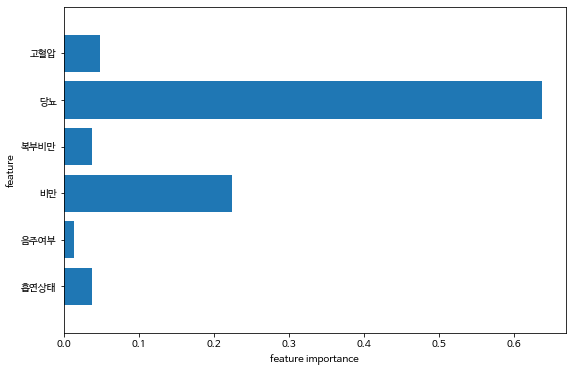

In [53]:
plot_feature_importances_final(gbrt)

In [54]:
#나무 깊이 제한, 과적합 피하기 위해서
gbrt = GradientBoostingClassifier(random_state=42, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.992
시험용 데이터 세트 정확도: 0.987


In [55]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.970
시험용 데이터 세트 정확도: 0.963


##### Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [57]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=5, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4, 5]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.982101,17,0.985878,0.982503,0.979139
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.992195,13,0.993275,0.990579,0.989906
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.999327,4,1.000000,0.999327,0.999327
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.999327,4,1.000000,0.999327,0.999327
4,"{'learning_rate': 0.1, 'max_depth': 5}",0.999731,1,1.000000,0.999327,0.999327
5,"{'learning_rate': 0.08, 'max_depth': 1}",0.946576,21,0.941493,0.978466,0.941454
6,"{'learning_rate': 0.08, 'max_depth': 2}",0.990983,14,0.993275,0.989233,0.989233
7,"{'learning_rate': 0.08, 'max_depth': 3}",0.999058,8,1.000000,0.998654,0.999327
8,"{'learning_rate': 0.08, 'max_depth': 4}",0.999327,4,1.000000,0.999327,0.999327
9,"{'learning_rate': 0.08, 'max_depth': 5}",0.999731,1,1.000000,0.999327,0.999327


In [58]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.9997


In [59]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 1.000


#### Decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


In [61]:
# 의사결정나무의 깊이를 5로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.954
시험용 데이터 정확도: 0.948


In [62]:
df_final2.columns[0:6]

Index(['흡연상태', '음주여부', '비만', '복부비만', '당뇨', '고혈압'], dtype='object')

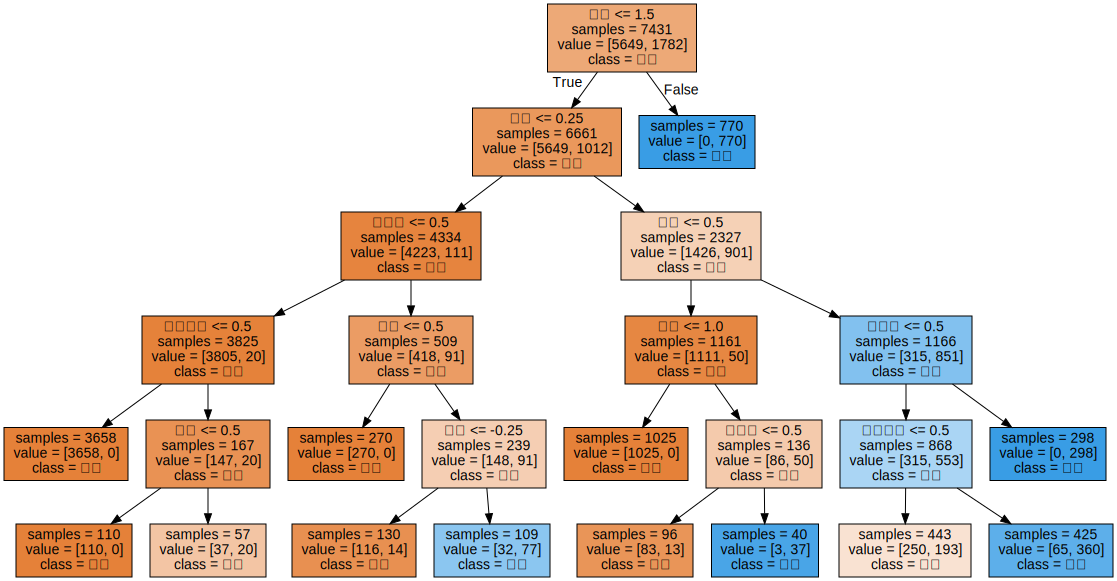

In [63]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "당뇨", "정상"],
                feature_names=df_final2.columns[0:6], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##### 변수중요도

In [64]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.03252732 0.         0.20860881 0.00202963 0.70336084 0.05347339]


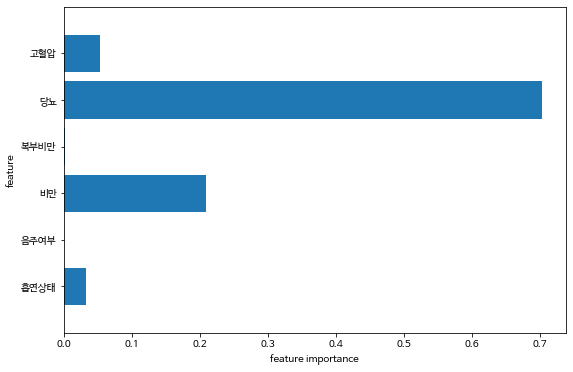

In [65]:
import numpy as np

def plot_feature_importances_final(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_final2.columns[0:6])  # 7개
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_final2.columns[0:6])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_final(tree)

#### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))

훈련세트 정확도: 0.990
테스트세트 정확도: 0.985


In [68]:
# create the classifier with n_estimators = 100

clf100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

clf100.fit(X_train, y_train)

clf100_pred = clf100.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(clf100.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(clf100.score(X_test, y_test)))

훈련세트 정확도: 1.000
테스트세트 정확도: 1.000


In [69]:
# view the feature scores

feature_scores = pd.Series(rand_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

당뇨      0.616453
비만      0.209794
고혈압     0.067755
복부비만    0.052860
흡연상태    0.032915
음주여부    0.020223
dtype: float64

##### 변수중요도

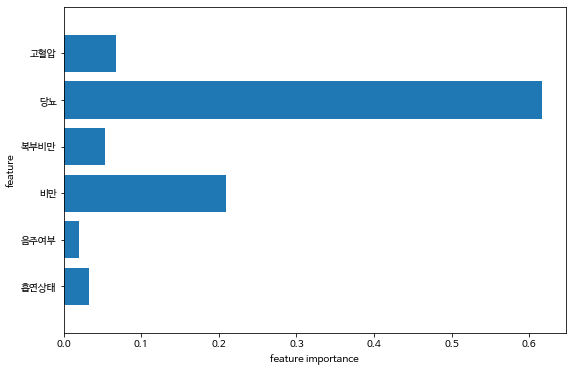

In [70]:
import numpy as np

def plot_feature_importances_final(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_final2.columns[0:6])  # 7개
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_final2.columns[0:6])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_final(rand_clf)

### 분류모델 평가 

#### 교차검증

In [76]:
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')  
rf_scores = cross_val_score(rand_clf, X_train, y_train, cv=5, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=5, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.95494284 0.94212651 0.95962315 0.9461642  0.9448183 ]
Random forest:  [0.99125757 0.99596231 0.99125168 0.99327052 0.98519515]
Gradient boosting:  [0.94149294 0.93135935 0.96904441 0.97442799 0.92866756]
Accuracy mean
Decision tree :0.950
Random forest :0.991
Gradient boosting :0.949


In [77]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(rand_clf, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.952
Random forest :0.991
Gradient boosting :0.950


### 모델 평가 지표

#### Confusion matrix

In [71]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[1884    0]
 [  37  557]]


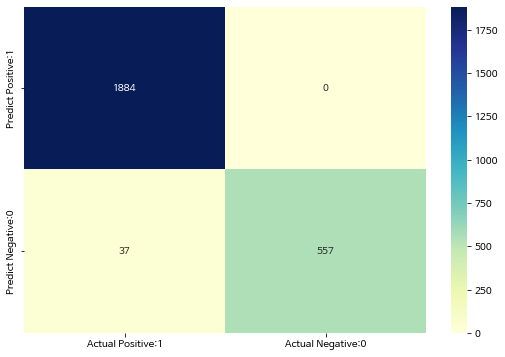

In [72]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 0,1 분포

dt_pred = tree.predict(X_test)
rf_pred = rand_clf.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

label_f
0          1884
1           594
dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.948
[[1852   32]
 [  97  497]]
Random forest 시험용 데이터 세트 정확도:0.985
[[1884    0]
 [  37  557]]
Gradient boosting 시험용 데이터 세트 정확도:1.000
[[1884    0]
 [   0  594]]


In [82]:
dt_pred = tree.predict(X_test)
rf_pred = rand_clf.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred))
print("Random Forest:")
print(classification_report(y_test, rf_pred))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1884
           1       0.94      0.84      0.89       594

    accuracy                           0.95      2478
   macro avg       0.94      0.91      0.93      2478
weighted avg       0.95      0.95      0.95      2478

Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1884
           1       1.00      0.94      0.97       594

    accuracy                           0.99      2478
   macro avg       0.99      0.97      0.98      2478
weighted avg       0.99      0.99      0.98      2478

Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1884
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00  

#### ROC

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


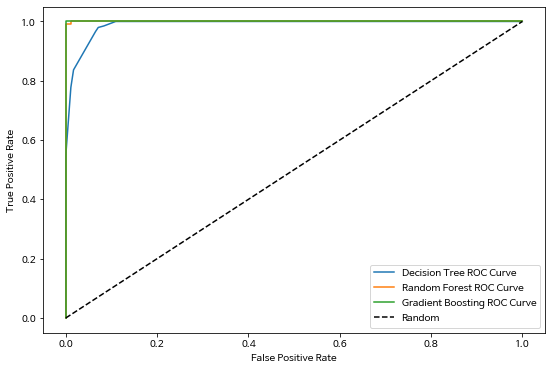

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve

print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:, 1], pos_label=1)
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, rand_clf.predict_proba(X_test)[:, 1], pos_label=1)
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label=1)

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [81]:
auc_dt = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rand_clf.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델

Decision Tree의 AUC: 0.990
Random Forest의 AUC: 1.000
Gradient Boosting의 AUC: 1.000




*   Random Forest, Gradient Boosting의 AUC가 1로 가장 높지만, 과적합의 가능성이 있어서 Decision Tree가 최적의 모델로 적합해 보인다. 
*   다만, confusion matrix에서 decision tree의 성능이 76%밖에 되지 않아, 성능 향상이 필요해 보인다. 

